# LINEAR CLASSIFICATION

## Introduction
In linear regression, the type of data we deal with is quantitative, whereas we use classification models to deal with qualitative data or categorical data. The algorithms used for solving a classification problem first predict the probability of each of the categories of the qualitative variables, as the basis for making the classification. And, as the probabilities are continuous numbers, classification using probabilities also behave like regression methods. 
Logistic regression is one such type of classification model which is used to classify the dependent variable into two or more classes or categories. 

###### Why don’t we use Linear regression for classification problems?


Let’s suppose you took a survey and noted the response of each person as satisfied, neutral or Not satisfied.
Let’s map each category:

Satisfied – 2

Neutral – 1

Not Satisfied – 0

But this doesn’t mean that the gap between Not satisfied and Neutral is same as Neutral and satisfied. There is no mathematical significance of these mapping. We can also map the categories like:

Satisfied – 0

Neutral – 1

Not Satisfied – 2

It’s completely fine to choose the above mapping. If we apply linear regression to both the type of mappings, we will get different sets of predictions. Also, we can get prediction values like 1.2, 0.8, 2.3 etc. which makes no sense for categorical values. So, there is no normal method to convert qualitative data into quantitative data for use in linear regression.
Although, for binary classification, i.e. when there only two categorical values, using the least square method can give decent results. Suppose we have two categories Black and White and we map them as follows:

Black – 0

White - 1 

We can assign predicted values for both the categories such as Y> 0.5 goes to class white and vice versa.
Although, there will be some predictions for which the value can be greater than 1 or less than 0 making them hard to classify in any class. Nevertheless, linear regression can work decently for binary classification but not that well for multi-class classification. 
Hence, we use classification methods for dealing with such problems.

## Logistic Regression

Logistic regression is one such regression algorithm which can be used for performing classification problems. **It calculates the probability that a given value belongs to a specific class** . If the probability is more than 50%, it assigns the value in that particular class else if the probability is less than 50%, the value is assigned to the other class. Therefore, we can say that logistic regression acts as a binary classifier.

###### Working of a Logistic Model
For linear regression, the model is defined by:
$y = \beta_0 + \beta_1x  $       - (i)

and for logistic regression, we calculate probability, i.e. y is the probability of a given variable x belonging to a certain class. Thus, it is obvious that the value of y should lie between 0 and 1.

But, when we use equation(i) to calculate probability, we would get values less than 0 as well as greater than 1. That doesn’t make any sense
.
So, we need to use such an equation which always gives values between 0 and 1, as we desire while calculating the probability.


#### Sigmoid function 

We use the sigmoid function as the underlying function in Logistic regression. Mathematically and graphically, it is shown as:

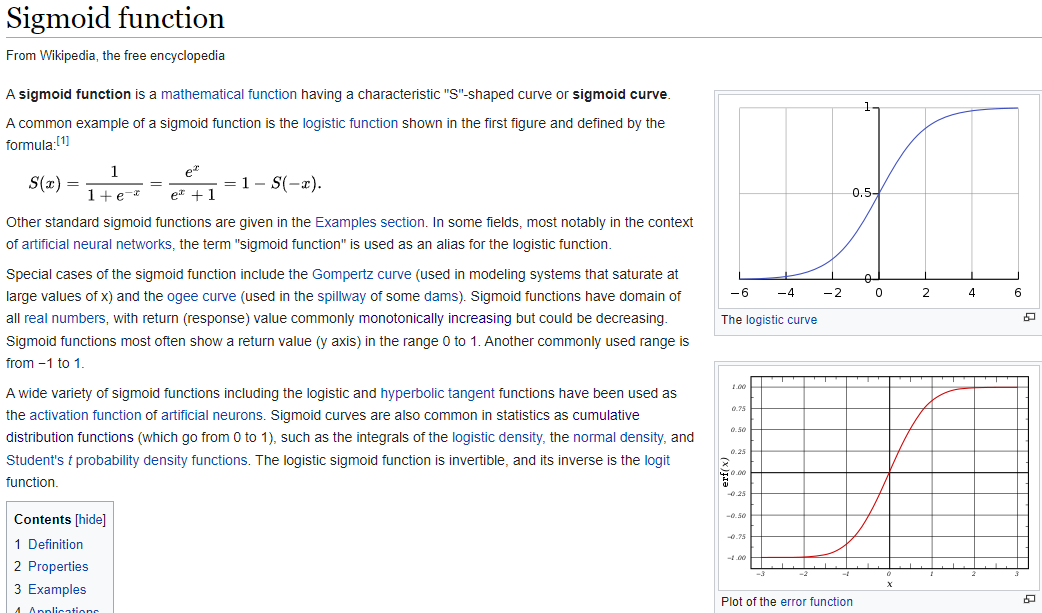

**Why do we use the Sigmoid Function?**

1)	The sigmoid function’s range is bounded between 0 and 1. Thus it’s useful in calculating the probability for the  Logistic function.
2)	 It’s derivative is easy to calculate than other functions which is useful during gradient descent calculation.
3)	It is a simple way of introducing non-linearity to the model.

Although there are other functions as well, which can be used, but sigmoid is the most common function used for logistic regression. We will talk about the rest of the functions in the neural network section.

The logistic function is given as:

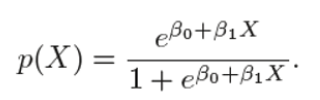

Let’s see some manipulation with the logistic function: 

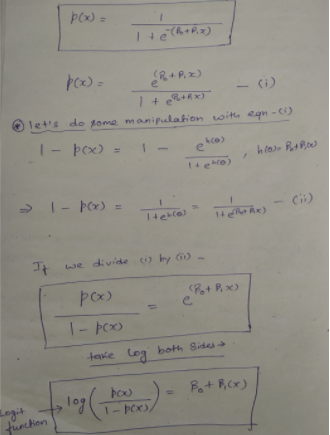

We can see that the logit function is linear in terms with x.

### Prediction

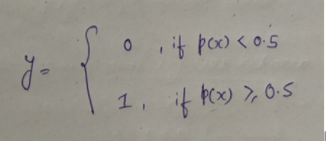


### Cost function

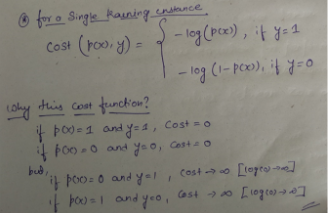

The cost function for the whole training set is given as :

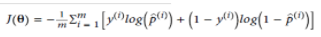

The values of parameters (θ) for which the cost function is minimum is calculated using the gradient descent (as discussed in the Linear Regression section) algorithm. The partial derivative for cost function is given as :

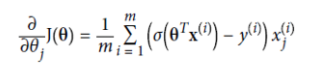

### Multiple Logistic Function

We can generalise the simple logistic function for multiple features as:

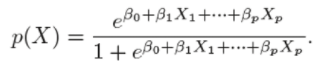

And the logit function can be written as:

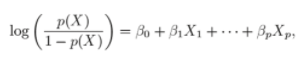

The coefficients are calculated the same we did for simple logistic function, by passing the above equation in the cost function.

Just like we did in multilinear regression, we will check for correlation between different features for Multi logistic as well.

We will see how we implement all the above concept through a practical example.

### Multinomial Logistics Regression( Number of Labels >2)

Many times, there are classification problems where the number of classes is greater than 2. 
We can extend Logistic regression for multi-class classification. The logic is simple; we train our logistic model for each class and calculate the probability(hθx) that a specific feature belongs to that class. Once we have trained the model for all the classes, we predict a new value’s class by choosing that class for which the probability(hθx) is maximum.
Although we have libraries that we can use to perform multinomial logistic regression, we rarely use logistic regression for classification problems where the number of classes is more than 2.
There are many other classification models for such scenarios. We will see more of that in the coming lectures.

### Learning Algorithm
The learning algorithm is how we search the set of possible hypotheses (hypothesis space $\mathcal{H}$) for the best parameterization (in this case the weight vector ${\bf w}$). This search is an optimization problem looking for the hypothesis that optimizes an error measure.

There is no sophisticted, closed-form solution like least-squares linear, so we will use gradient descent instead. Specifically we will use batch gradient descent which calculates the gradient from all data points in the data set.

Luckily, our "cross-entropy" error measure is convex so there is only one minimum. Thus the minimum we arrive at is the global minimum.

To learn we're going to minimize the following error measure using batch gradient descent.

$$
e(h({\bf x}_n), y_n) = \ln \left( 1+e^{-y_n \; {\bf w}^T {\bf x}_n} \right) \\
E_\text{in}({\bf w}) = \frac{1}{N} \sum_{n=1}^{N} e(h({\bf x}_n), y_n) = \frac{1}{N} \sum_{n=1}^{N} \ln \left( 1+e^{-y_n \; {\bf w}^T {\bf x}_n} \right)
$$

We'll need the derivative of the point loss function and possibly some abuse of notation.

$$
\frac{d}{d{\bf w}} e(h({\bf x}_n), y_n)
= \frac{-y_n \; {\bf x}_n \; e^{-y_n {\bf w}^T {\bf x}_n}}{1 + e^{-y_n {\bf w}^T {\bf x}_n}}
= -\frac{y_n \; {\bf x}_n}{1 + e^{y_n {\bf w}^T {\bf x}_n}}
$$

With the point loss derivative we can determine the gradient of the in-sample error:

$$
\begin{align}
\nabla E_\text{in}({\bf w})
&= \frac{d}{d{\bf w}} \left[ \frac{1}{N} \sum_{n=1}^N e(h({\bf x}_n), y_n) \right] \\
&= \frac{1}{N} \sum_{n=1}^N \frac{d}{d{\bf w}} e(h({\bf x}_n), y_n) \\
&= \frac{1}{N} \sum_{n=1}^N \left( - \frac{y_n \; {\bf x}_n}{1 + e^{y_n {\bf w}^T {\bf x}_n}} \right) \\
&= - \frac{1}{N} \sum_{n=1}^N \frac{y_n \; {\bf x}_n}{1 + e^{y_n {\bf w}^T {\bf x}_n}} \\
\end{align}
$$

Our weight update rule per batch gradient descent becomes

$$
\begin{align}
{\bf w}_{i+1} &= {\bf w}_i - \eta \; \nabla E_\text{in}({\bf w}_i) \\
&= {\bf w}_i - \eta \; \left( - \frac{1}{N} \sum_{n=1}^N \frac{y_n \; {\bf x}_n}{1 + e^{y_n {\bf w}_i^T {\bf x}_n}} \right) \\
&= {\bf w}_i + \eta \; \left( \frac{1}{N} \sum_{n=1}^N \frac{y_n \; {\bf x}_n}{1 + e^{y_n {\bf w}_i^T {\bf x}_n}} \right) \\
\end{align}
$$

where $\eta$ is the learning rate.

## Evaluation of a Classification Model

In machine learning, once we have a result of the classification problem, how do we measure how accurate our classification is?
For a  regression problem, we have different metrics like R Squared score, Mean Squared Error etc. what are the metrics to measure the credibility of a classification model?

Metrics
In a regression problem, the accuracy is generally measured in terms of the difference in the actual values and the predicted values.
In a classification problem, the credibility of the model is measured using the confusion matrix generated, i.e., how accurately the true positives and true negatives were predicted.
The different metrics used for this purpose are:
- Accuracy
- Recall
- Precision
- F1 Score
- Specifity
- AUC( Area Under the Curve)
- RUC(Receiver Operator Characteristic)

### Confusion Matrix

A typical confusion matrix looks like the figure shown.

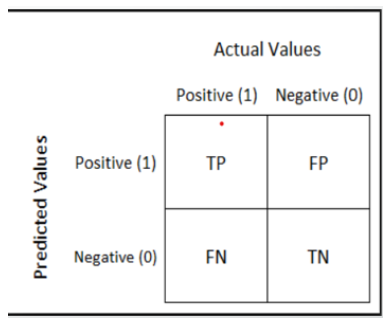

Where the terms have the meaning:

	__True Positive(TP):__ A result that was predicted as positive by the classification model and also is positive

	__True Negative(TN):__ A result that was predicted as negative by the classification model and also is negative

	__False Positive(FP):__ A result that was predicted as positive by the classification model but actually is negative

	__False Negative(FN):__ A result that was predicted as negative by the classification model but actually is positive.

The Credibility of the model is based on how many correct predictions did the model do.

### Accuracy
The mathematical formula is :

   __Accuracy__= $ \frac{ (TP+TN)}{(TP+TN+FP+FN)} $
    
Or, it can be said that it’s defined as the total number of correct classifications divided by the total number of classifications. 

#### Recall or Sensitivity
The mathematical formula is:

   __Recall__= $ \frac{ TP}{(TP+FN)} $

Or, as the name suggests, it is a measure of: from the total number of positive results how many positives were correctly predicted by the model.

It shows how relevant the model is, in terms of positive results only.

Let’s suppose in the previous model, the model gave 50 correct predictions(TP) but failed to identify 200 cancer patients(FN). Recall in that case will be:

Recall=$ \frac {50}{(50+200)} $= 0.2 (The model was able to recall only 20% of the cancer patients)

### Precision

Precision is a measure of amongst all the positive predictions, how many of them were actually positive. Mathematically,

Precision=$ \frac {TP}{(TP+FP)} $

Let’s suppose in the previous example, the model identified 50 people as cancer patients(TP) but also raised a  false alarm for 100 patients(FP). Hence,

Precision=$ \frac {50}{(50+100)} $=0.33 (The model only has a precision of 33%)


### But we have a problem!!

As evident from the previous example, the model had a very high Accuracy but performed poorly in terms of Precision and Recall. So, necessarily _Accuracy_ is not the metric to use for evaluating the model in this case.

Imagine a scenario, where the requirement was that the model recalled all the defaulters who did not pay back the loan. Suppose there were 10 such defaulters and to recall those 10 defaulters, and the model gave you 20 results out of which only the 10 are the actual defaulters. Now, the recall of the model is 100%, but the precision goes down to 50%.


### A Trade-off?

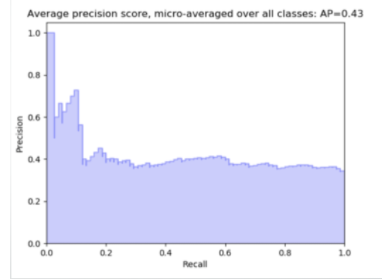

As observed from the graph, with an increase in the Recall, there is a drop in Precision of the model.

So the question is - what to go for? Precision or Recall?

Well, the answer is: it depends on the business requirement.

For example, if you are predicting cancer, you need a 100 % recall. But suppose you are predicting whether a person is innocent or not, you need 100% precision.

Can we maximise both at the same time? No

So, there is a need for a better metric then?

Yes. And it’s called an _F1 Score_

### F1 Score

From the previous examples, it is clear that we need a metric that considers both Precision and Recall for evaluating a model. One such metric is the F1 score.

F1 score is defined as the harmonic mean of Precision and Recall. 

The mathematical formula is:
        F1 score= $ \frac {2*((Precision*Recall)}{(Precision+Recall))} $


### Specificity or True Negative Rate

This represents how specific is the model while predicting the True Negatives.
Mathematically,

   Specificity=$ \frac {TN}{(TN+FP)} $
Or, it can be said that it quantifies the total number of negatives predicted by the model with respect to the total number of actual negative or non favorable outcomes.

Similarly, False Positive rate can be defined as:  (1- specificity)
Or,  $ \frac {FP}{(TN+FP)} $

### ROC(Receiver Operator Characteristic)

We know that the classification algorithms work on the concept of probability of occurrence of the possible outcomes. A probability value lies between 0 and 1. Zero means that there is no probability of occurrence and one means that the occurrence is certain.

But while working with real-time data, it has been observed that we seldom get a perfect 0 or 1 value. Instead of that, we get different decimal values lying between 0 and 1. Now the question is if we are not getting binary probability values how are we actually determining the class in our classification problem?

There comes the concept of Threshold. A threshold is set, any probability value below the threshold is a negative outcome, and anything more than the threshold is a favourable or the positive outcome. For Example, if the threshold is 0.5, any probability value below 0.5 means a negative or an unfavourable outcome and any value above 0.5 indicates a positive or favourable outcome. 

Now, the question is, what should be an ideal threshold?


The following diagram shows a typical logistic regression curve.

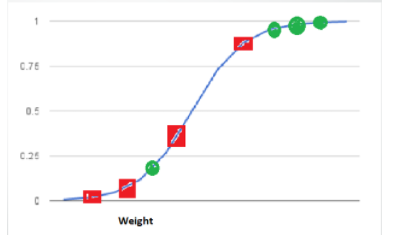

* The horizontal lines represent the various values of thresholds ranging from 0 to 1.
* Let’s suppose our classification problem was to identify the obese people from the given data.
* The green markers represent obese people and the red markers represent the non-obese people.
* Our confusion matrix will depend on the value of the threshold chosen by us.
* For Example, if 0.25 is the threshold then
        TP(actually obese)=3
        TN(Not obese)=2
        FP(Not obese but predicted obese)=2(the two red squares above the 0.25 line)
        FN(Obese but predicted as not obese )=1(Green circle below 0.25line  )


A typical ROC curve looks like the following figure.

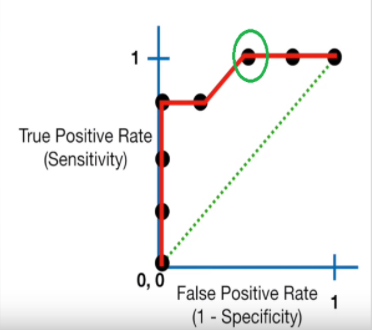

* Mathematically, it represents the various confusion matrices for various thresholds. Each black dot is one confusion matrix.
* The green dotted line represents the scenario when the true positive rate equals the false positive rate.
* As evident from the curve, as we move from the rightmost dot towards left, after a certain threshold, the false positive rate decreases.
* After some time, the false positive rate becomes zero.
* The point encircled in green is the best point as it predicts all the values correctly and keeps the False positive as a minimum.
* But that is not a rule of thumb. Based on the requirement, we need to select the point of a threshold.
* The ROC curve answers our question of which threshold to choose.


### But we have a confusion!!

Let’s suppose that we used different classification algorithms, and different ROCs for the corresponding algorithms have been plotted.
The question is: which algorithm to choose now?
The answer is to calculate the area under each ROC curve.

#### AUC(Area Under Curve)

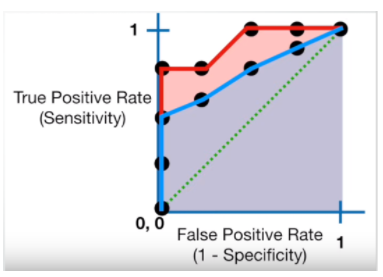

* It helps us to choose the best model amongst the models for which we have plotted the ROC curves
* The best model is the one which encompasses the maximum area under it.
* In the adjacent diagram, amongst the two curves, the model that resulted in the red one should be chosen as it clearly covers more area than the blue one


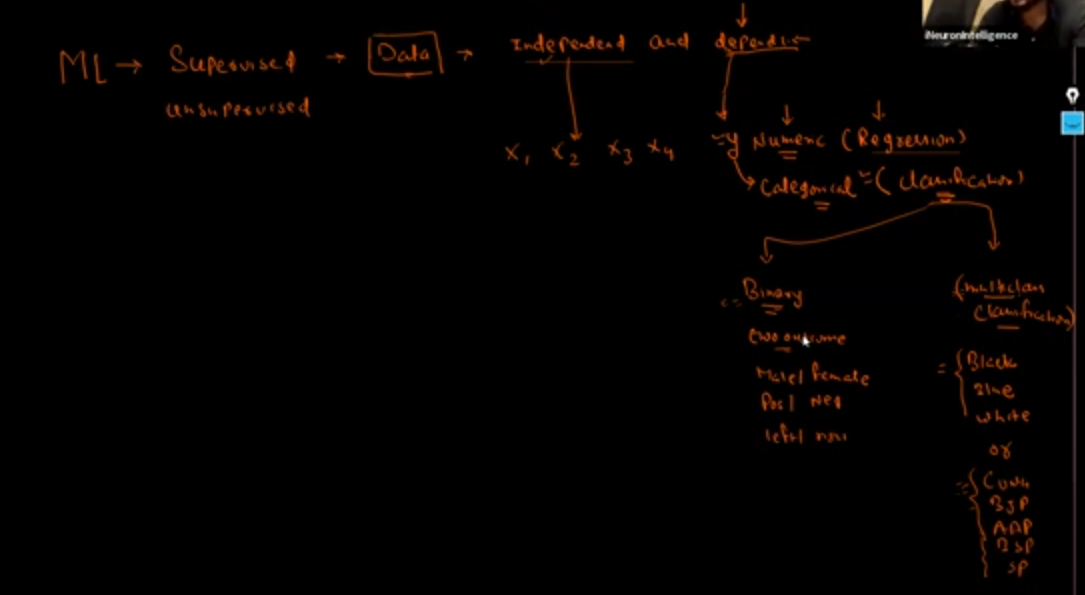

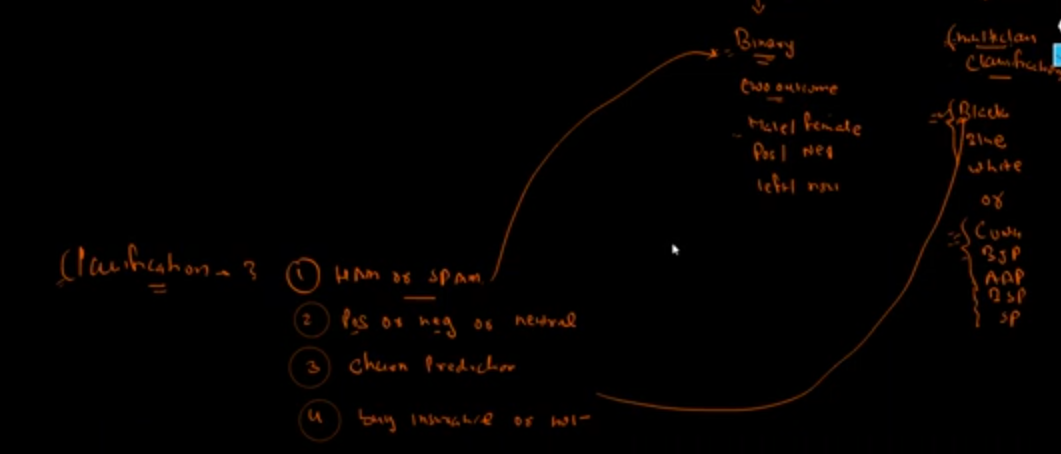

## logistic regression - linear classification
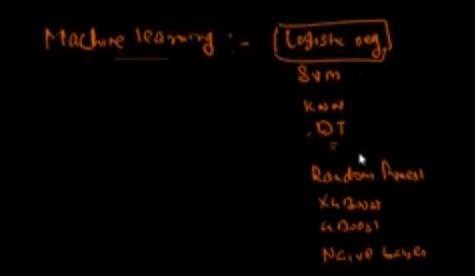

* linear regression to separate linear separable
* if data is linear separable and not linear separable then SVM should be used
* if data is continuos but do not follow a linear approach then we can use any of the other regression approaches

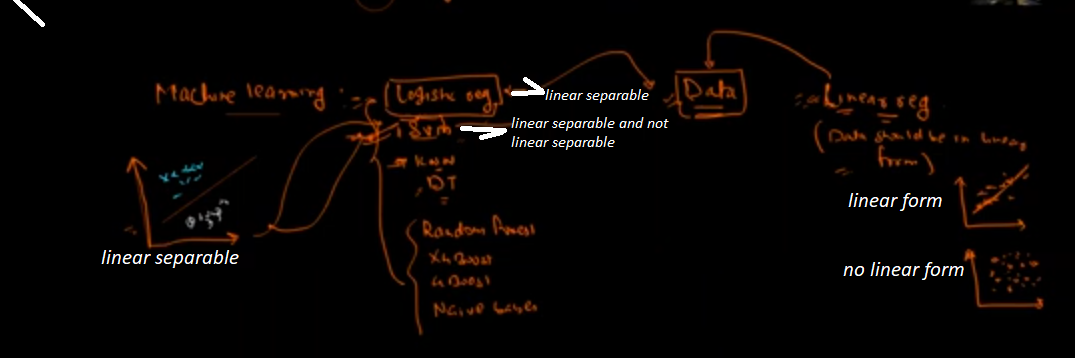

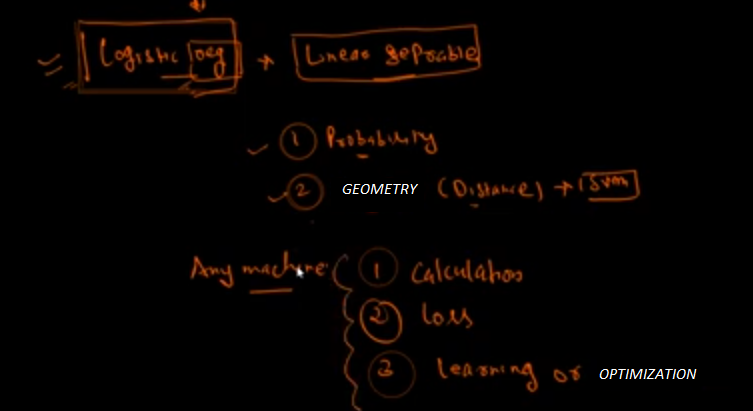

* Binary Classification:

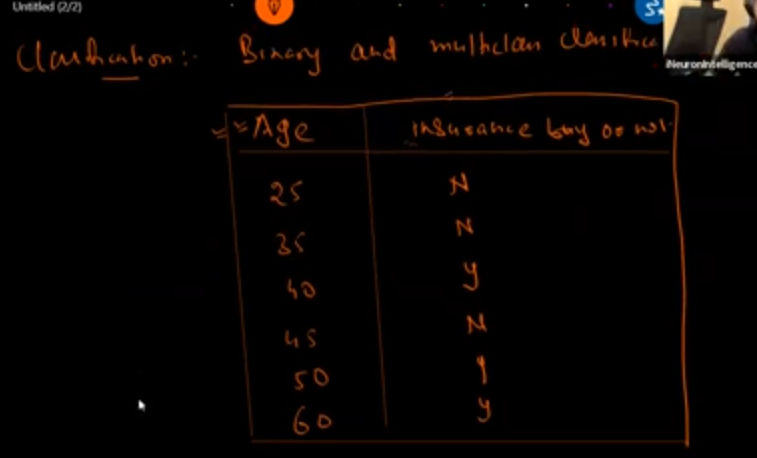

* graphic representation
* a line will not fit our data
* a line may give values higher than 1 and lower than 0

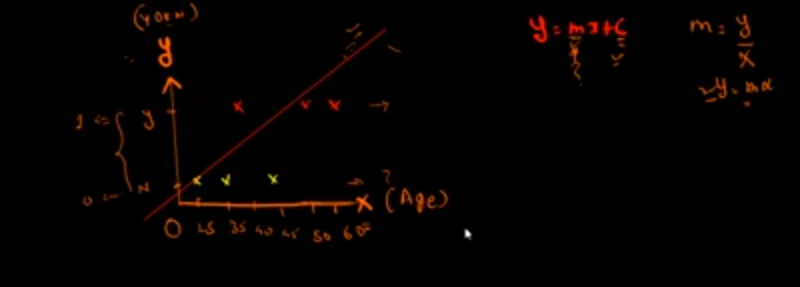

* Use of sigmoid function will allow us to limit our values between zero to one
* by using the liner equation inside of the sigmoid funciton we squeeze the line

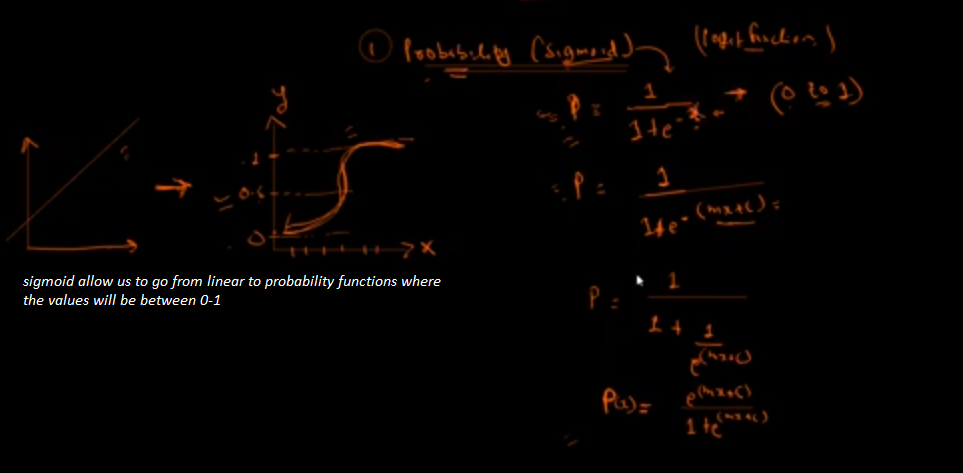

* logistic function - log of the odds (prob happening / prob of not happening)

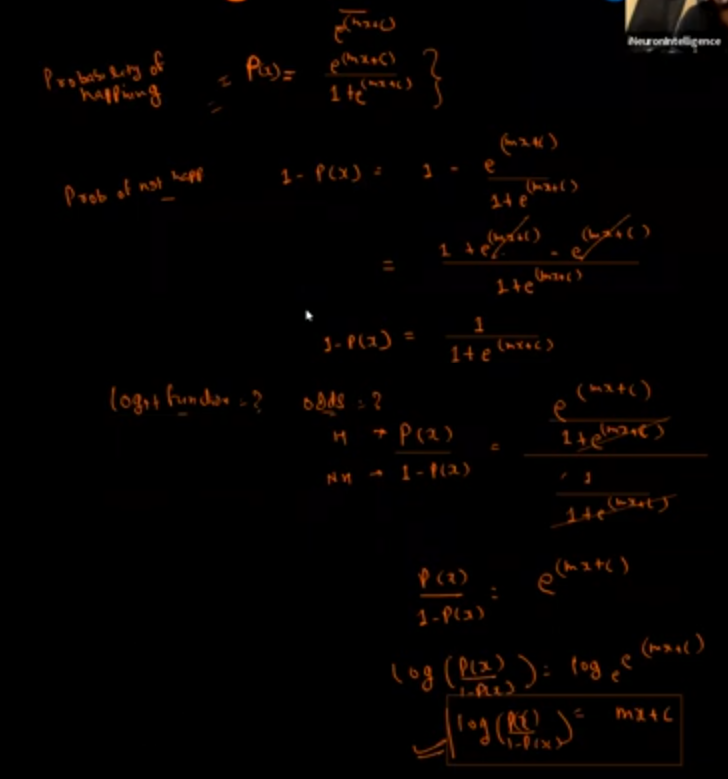

* loss(one row) / cost(all rows)

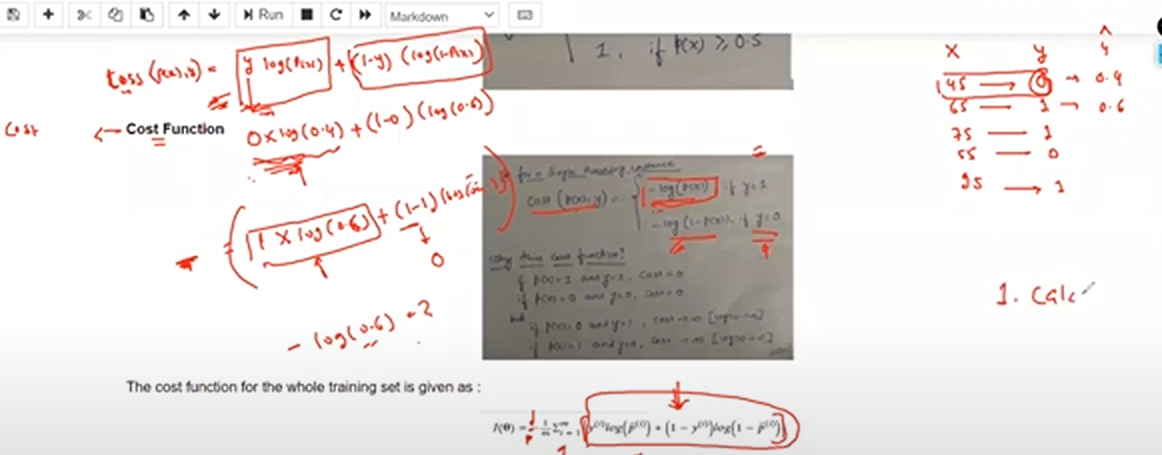

* optimization

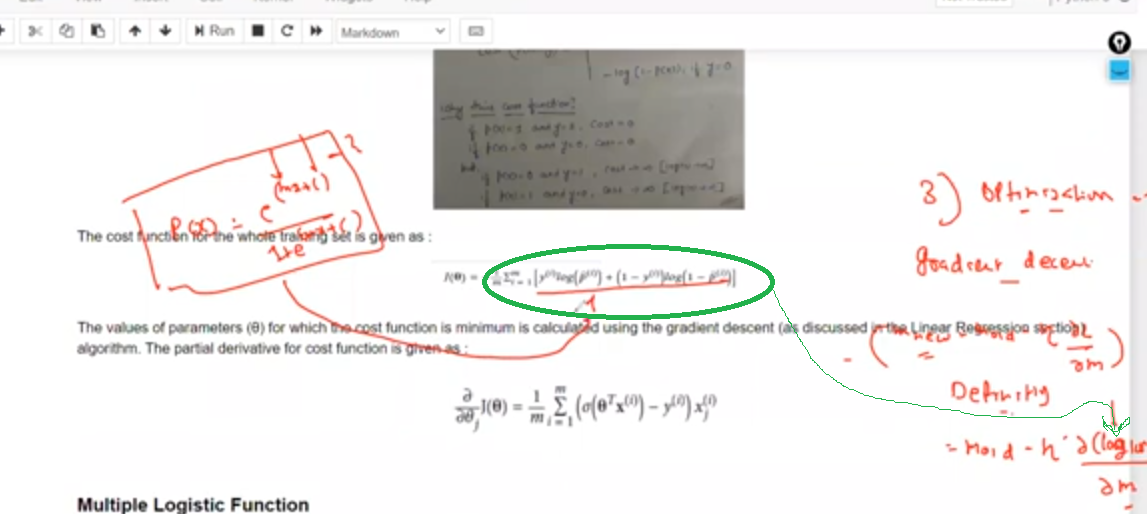

## more explanation about sigmoid and log(odds)

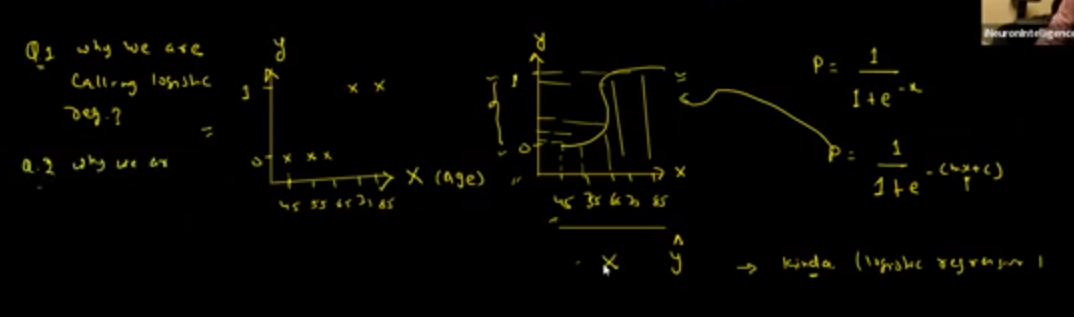

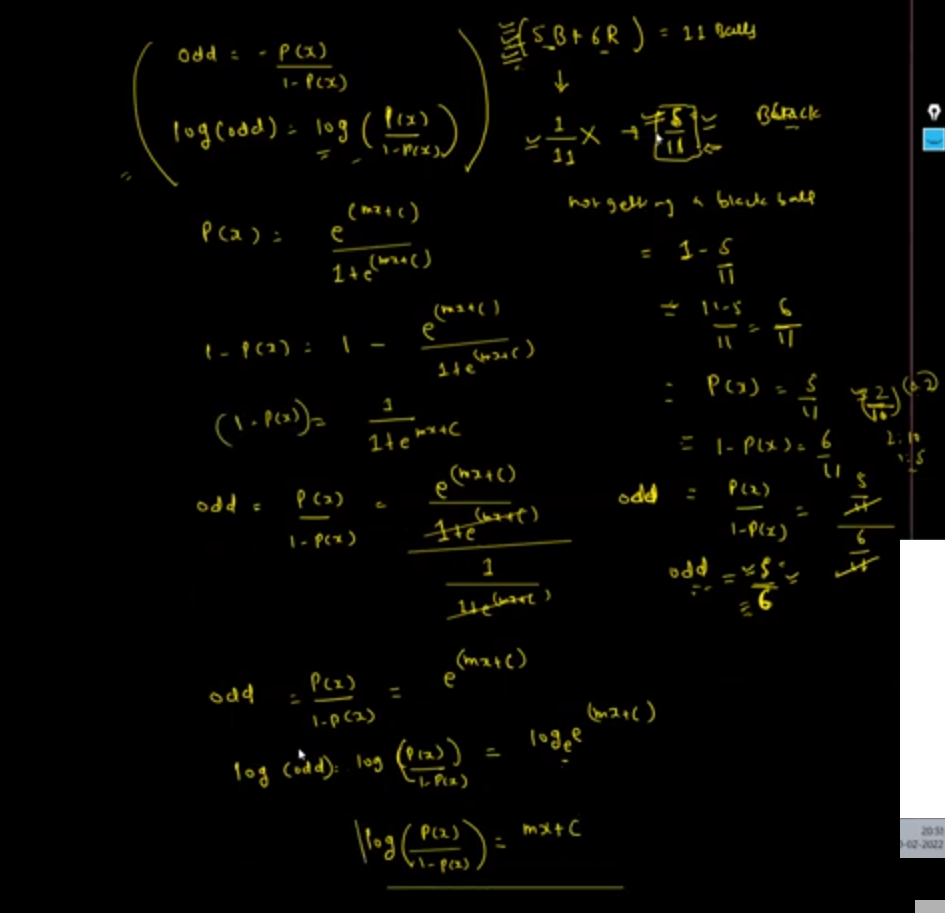

* p(x) gives the probability for each x value, the probability is given by the sigmoid function.
* the log (odds) is used to transform the probability into a linear funcion 

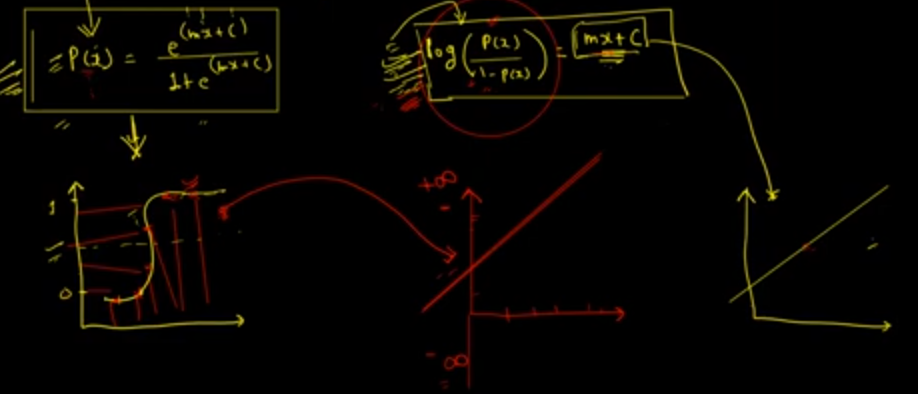

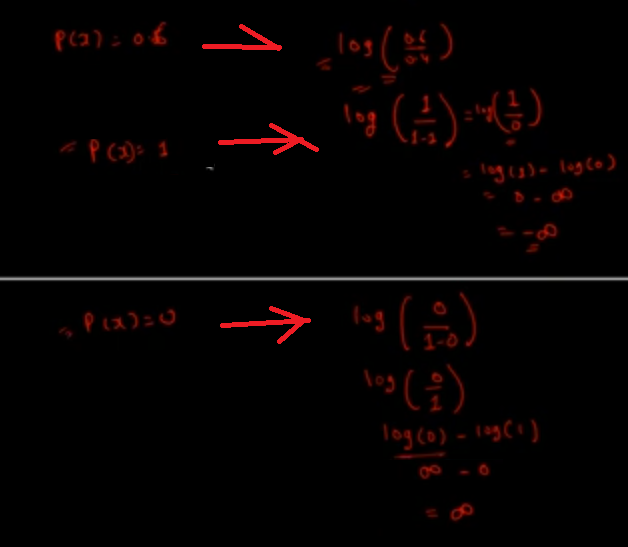

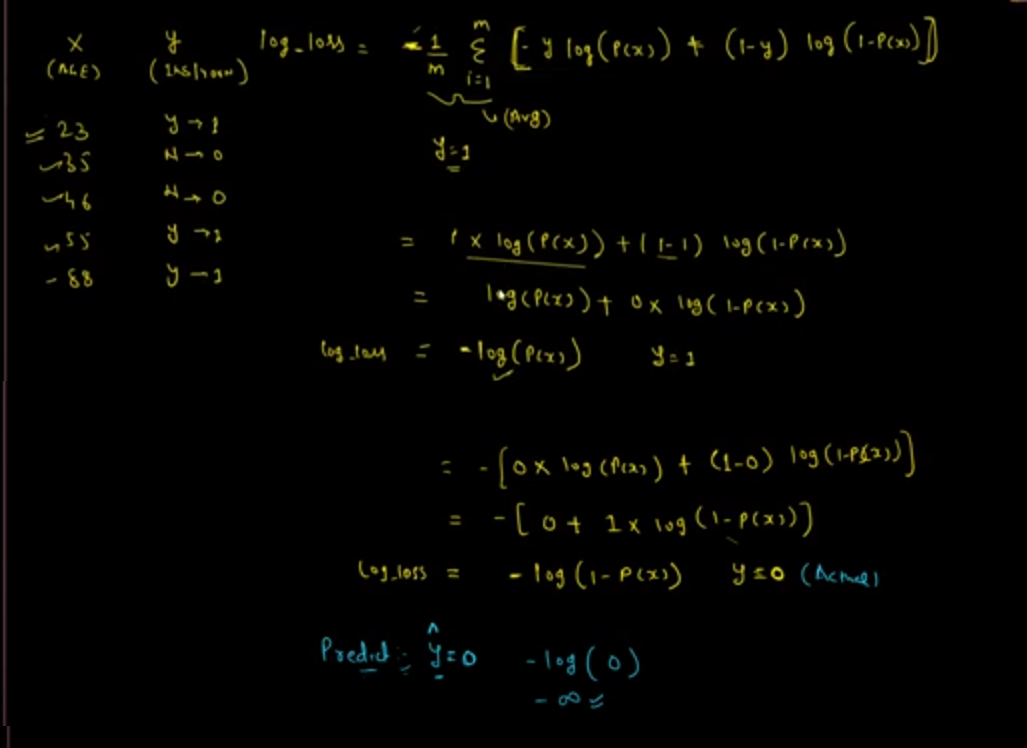

* for optimization we can use two approaches:
    * MLE (maximum likehood estimation - probability)
    * interactive (Gradient descent)